In [43]:
import numpy as np
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump

In [5]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df_counts = df['target'].value_counts()
df_counts

target
1    526
0    499
Name: count, dtype: int64

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [18]:
matrix = df.corr()

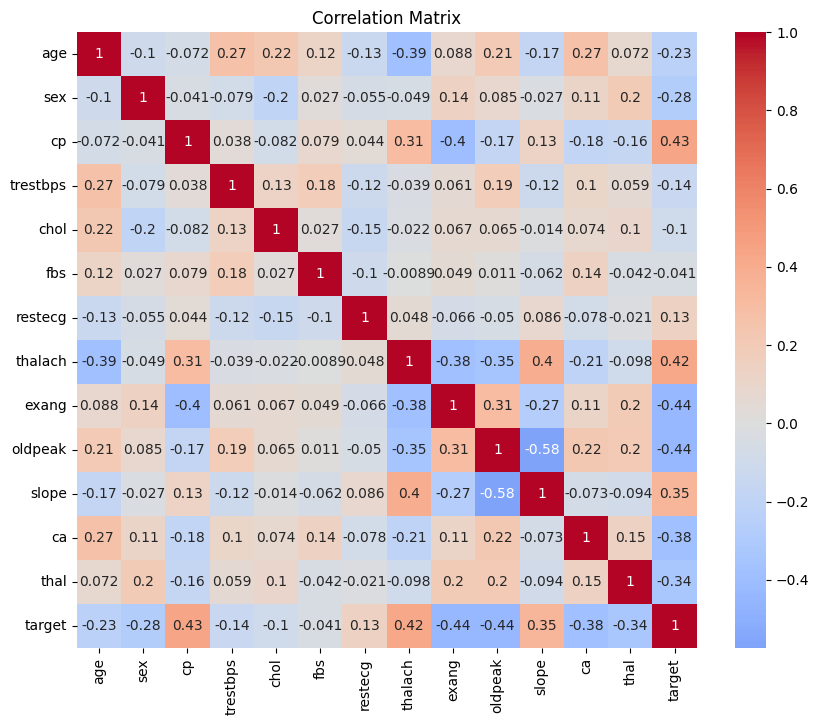

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(matrix, annot=True , cmap='coolwarm',center=0)
plt.title('Correlation Matrix')
plt.show()

In [25]:
X = df.drop(columns='target')
y = df['target']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True,stratify=y)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_model = SVC(kernel='linear') 
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

# Mengevaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Akurasi: {accuracy}")
print("Laporan Klasifikasi:\n", classification_rep)
print("Matriks Kebingungan:\n", conf_matrix)

Akurasi: 0.8146341463414634
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       100
           1       0.76      0.92      0.84       105

    accuracy                           0.81       205
   macro avg       0.83      0.81      0.81       205
weighted avg       0.83      0.81      0.81       205

Matriks Kebingungan:
 [[70 30]
 [ 8 97]]


In [41]:

new_data = np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

# Standardisasi data baru menggunakan scaler yang sama
new_data_standardized = scaler.transform(new_data)

# Prediksi menggunakan model yang telah dilatih
new_predictions = svm_model.predict(new_data_standardized)

print("Prediksi untuk data baru:", new_predictions)

# Jika label benar tersedia untuk data baru, kita bisa mengevaluasi kinerjanya
true_labels = np.array([0])  # Misalnya, label sebenarnya untuk new_data adalah 0 dan 2

# Evaluasi hasil prediksi
accuracy_new_data = accuracy_score(true_labels, new_predictions)
classification_rep_new_data = classification_report(true_labels, new_predictions)
conf_matrix_new_data = confusion_matrix(true_labels, new_predictions)

print(f"Akurasi untuk data baru: {accuracy_new_data}")
print("Laporan Klasifikasi untuk data baru:\n", classification_rep_new_data)

Prediksi untuk data baru: [0]
Akurasi untuk data baru: 1.0
Laporan Klasifikasi untuk data baru:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:395: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [44]:
dump(svm_model, 'svm_model.joblib')
dump(scaler, 'scaler.joblib')

['scaler.joblib']